# Prueba de conocimiento: Datos no estructurados            
*Nombre: Nicolás Guerrero Caballero* 


<img src=https://lf16-adcdn-va.ibytedtos.com/obj/i18nblog//images/c16f4d7d8bc7e892764e658f10ccd932.jpg> 

*Nota: Imagen extraida de la página oficial de Davivienda*

**Índice:**

0. Librerías.
1. Importe, limpieza y manipulación de la base de datos.
    - 1.1 Importe de la base de datos.
    - 1.2 Limpieza de la base de datos.
    - 1.3 Manipulación de la base de datos.
2. Exploración de datos.
    - 2.1 Análisis sobre la variable dependiente
    - 2.2 Análisis sobre las variables independientes
3. Predicción de Precios.
    - 3.1 Modelo Decision Tree Regression
    - 3.2 Modelo Random Forest Regression
    - 3.3 Modelo Regresion Multiple
4. Comparación de métodos de predicción.

## 0. Librerías.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sb
import csv 
from scipy.stats import kurtosis, median_abs_deviation, tstd, skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from common_functions import get_dummys, get_float, clean_text, get_graph

## 1. Importe, limpieza y manipulación de la base de datos.

### 1.1 Importe de base de datos.
En primer momento, se observan varias caracteristicas que deben ser trabajadas en la base de datos:

- Variedad de formatos en el archivo CSV y respuestas:
    - Quotechar en algunos registros es " y en otros es """.
    - En algunos registros existen más o menos columnas que el estándar, provocando que la información del DF quede "corrida" y algunos datos queden registrados en la columna incorrecta.
- Formatos de las variables combinados:
    - Variables dicotomicas (si/no)|(aplica/no aplica) combinadas con variables numericas (0/1).
    - , y . usados para indicar decimales simultaneamente.
    - Fechas en formatos de duración.
- Base codificada


In [2]:
# Se importa y vizualiza la base de datos
df_train = pd.read_csv('test_precios_vivienda.csv', index_col = 0, delimiter = ',', encoding='utf-8')
df_train.tail(10)

,id,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,municipio_inmueble,...,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
2531,3642,43041.415631,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,RISARALDA,DOS QUEBRADAS,...,0,0,0,No,0,"138451380,00",2520499,"549301,47",0.000000,0.000000
10413,14878,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,ANTIOQUIA,MEDELLIN,...,0,0,0,No,0,178079249,259.51429999999999,686202.07,-75.580029,6.279203
5651,8045,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,ATLÃNTICO,BARRANQUILLA,...,0,0,0,No,0,103158000,254.86779999999999,404751.01,-74.809210,10.967720
1068,1553,43004.413185,Originación,Leasing Habitacional,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,NORTE DE SANTANDER,CUCUTA,...,91800000,0,0,0,0,132300000,2517682,"525483,36",0.000000,0.000000
12372,17645,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,VIS,VALLE DEL CAUCA,FLORIDA,...,48356000,0,0,0,0,63900200,259.52749999999997,246217.45,-76.241514,3.425065
5006,7139,43152.000000,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,ANTIOQUIA,ENVIGADO,...,0,0,0,No,0,278310000,253.89789999999999,1096149.28,-73.270930,10.462100
11210,16017,NaN,OriginaciÃ³n,Colomext Hipotecario,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,ANTIOQUIA,SABANETA,...,0,0,0,No,0,271740200,259.79050000000001,1045997.45,-75.614410,6.151869
9341,13347,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,RISARALDA,PEREIRA,...,0,0,0,Si,18800749,289103749,258.85320000000002,1116863.72,-75.755370,4.798798
5270,7520,43159.000000,OriginaciÃ³n,Empleados,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,"BOGOTÃ, D. C.","BOGOTÃ, D. C.",...,0,0,0,No,0,665724800,254.29679999999999,2617904.75,-74.610458,10.463742
9722,13883,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,PUTUMAYO,VILLAGARZON,...,60270000,0,0,0,0,85470000,259.0471,329940,-76.621940,1.026799


In [3]:
# Para evitar realizar el preprocesamiento desde cero con la base test, se importa y se concatena con la base de entrenamiento, para en un segundo momento realizar el split de la base.
df_test = pd.read_csv('train_precios_vivienda.csv', index_col = 0, delimiter = ',', encoding='utf-8')
df_test = pd.concat([df_train, df_test])

C:\Users\PC\AppData\Local\Temp\ipykernel_9836\4025677459.py:2: DtypeWarning: Columns (67,109,110,160,168,169,170,171,178,180) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('train_precios_vivienda.csv', index_col = 0, delimiter = ',', encoding='utf-8')


In [4]:
# Se obtiene información sobre la misma
df_test.info()
# Se cuenta con 12857 valores, con 6 en formato flotante, 17 en formato entero y 198 en formato object antes de ser depurada

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12857 entries, 7811 to 7270
Columns: 221 entries, id to Latitud
dtypes: float64(6), int64(17), object(198)
memory usage: 21.8+ MB


### ----------------------------------------------------------------

### 1.2 Limpieza de la base de datos.
Se detectó que por problemas en el formato del archivo CSV y por diferencias en el número de columnas en algunos registros, la información se organiza de manera incorrecta al importarla con el comando *read_csv* estos casos son tan variados que llegar a una solución que corrija todos los problemas de importación puede llegar a tomar un tiempo cosiderable por lo que se opta por detectar estos registros y eliminarlos de la muestra.
Por otro lado, existen variables que no tienen relación económica con el precio.

Tomamos las variables que previamente se conoce que son numéricas y revisamos si tienen respuestas no numéricas (texto), si en efecto las tiene, es un indicador de que algunos registros de la base no se importaron adecuadamente.

In [5]:
# Se hace una lista con las variables numéricas
var_num = ['estrato', 'numero_total_de_garajes', 'area_privada', 'valor_total_avaluo','cocina','area_construccion','bano_privado', 'numero_total_depositos']

# Para casa variable...
for i in var_num:

    # Se determinan las respuestas y las frecuencias de las mismas, luego se toman las respuestas y se tratan de convertir a decimal...
    for j in list(df_test[i].value_counts().index):

        try:
            float(j)

        # Si no se logra, quiere decir que la variables es una cadena de texto, como sabemos que la variable debe ser numérica inferimos que la ubicacion de los 
        # datos del registro no es adecuada por lo que se elimina el registro de la muestra.
        except:
            to_drop = df_test[df_test[i] == j]['id']
            
            for k in to_drop:
                df_test = df_test[df_test['id'] != int(k)]

print('Luego de verificar los valores de las variables numéricas se obtuvieron', len(df_test), 'registros')

Luego de verificar los valores de las variables numéricas se obtuvieron 9229 registros


Con el fin de verificar que las variables tengan la información correctamente registrada se verificarán las respuestas de las variables dummy:

In [6]:
# Para cada una de las columnas...
for i in list(df_test.columns):

    # Tomaremos los valores únicos que se registran en ellas...
    values_list = list(df_test[i].value_counts().index)
    values_list = [str(j).lower().replace('í','i').strip() for j in values_list]

    # Si 'sí' o 'no' aparecen juntos en las respuestas de la columna, entonces es candidata a ser dummy...
    if (('si' in values_list) & ('no' in values_list))|(('aplica' in values_list) & ('no aplica' in values_list)):


        # Tomamos la frecuencias con la que aparecen las respuestas y normalizamos las respuestas que aparecen en el índice...
        unique_values = df_test[i].value_counts()
        unique_values.index = unique_values.index.str.lower().str.replace('í','i').str.strip()

        
        # En algunos casos, por problemas en el formato de importación del archivo puede que nos aparezcan respuestas extrañas
        # así que las respuestas con menos de 6 registros se toman como erroneas... 
        valores_extranos = list(unique_values[unique_values <= 6].index)

        
        # y para evitar que los valores aparezcan en columnas incorrectas, se elimina el registro...
        for j in valores_extranos:
            to_drop = df_test[df_test[i] == j]['id']
            for k in to_drop:
                df_test = df_test[df_test['id'] != int(k)]


print('Luego de verificar los valores de las variables candidatas a dummy se obtuvieron', len(df_test), 'registros')

Luego de verificar los valores de las variables candidatas a dummy se obtuvieron 9229 registros


Como se puede observar, las variables candidatas dummy no tuvieron problemas en sus respuestas por lo que se puede inferir que la base, luego de ser depurada, contiene la información adecuadamente registrada.

Ahora bien, existen variables enteramente aleatorias que, apelando al sentido económico, no poseen relación con el precio del inmueble a no ser que se trate de una relación espúria. Para evitar esta situación, se detectan y eliminan estas variables de la base de datos.

In [7]:
# Generamos una lista donde se guardarán las variables sin relación...
variables_sin_relacion = []

# y las detectamos en el DF...
for i in list(df_test.columns):
    if ('matricula' in i)|('numero_garaje' in i)|('numero_deposito' in i)|('metodo_valuacion' in i)|('concepto_del_metodo' in i)|('direccion_inmueble_informe' in i)|('barrio' in i)|('area_actividad' in i):
        variables_sin_relacion.append(i)

# Una vez detectadas procedemos a eliminarlas:
df_test = df_test.drop(variables_sin_relacion, axis=1)

### ----------------------------------------------------------------

### 1.3 Manipulación de la base de datos.
Partiendo de la idea de que no se tiene de antemano la clasificación de las variables, en primer momento se procede a identificar cada tipo de variable segmentandolas en 4 grupos: dummys, de texto, numéricas y categoricas, para así poderles dar un formato adecuado acorde con lo detectado en el punto 1.1.

#### 1.3.1 Variables dummys.

In [8]:
# Se generan listas para la clasificación de las variables
variables_dummy = []
variables_no_dummy = []
variables_sin_especificar = []


# Para cada una de las columnas...
for i in list(df_test.columns):

    # Tomaremos los valores únicos que se registran en ellas...
    values_list = list(df_test[i].value_counts().index)
    values_list = [str(j).lower().replace('í','i').strip() for j in values_list]


    # Si 'sí' o 'no' aparecen juntos en las respuestas de la columna, entonces es candidata a ser dummy...
    if (('si' in values_list) & ('no' in values_list))|(('aplica' in values_list) & ('no aplica' in values_list)):


        # Tomamos la frecuencias con la que aparecen las respuestas y normalizamos las respuestas que aparecen en el índice...
        unique_values = df_test[i].value_counts()
        unique_values.index = unique_values.index.str.lower().str.replace('í','i').str.strip()
    

        # Se toma la cantidad de 'si' y 'no que aparezcan en las respestas...
        cant_sino = unique_values.get('si', 0) + unique_values.get('no', 0)
        cant_sino_aplica = unique_values.get('aplica', 0) + unique_values.get('siaplica', 0) + unique_values.get('noaplica', 0)

        
        # También el número total de respuestas...
        reg_total = unique_values.sum()


        # Y si el 90% de las respuestas son sí y no, y no hay más de tres respuestas en la columna se puede tomar la variable como dicotómica.
        if (cant_sino/reg_total > 0.9)|(cant_sino_aplica/reg_total > 0.9)|(len(values_list) <= 3):
            
            variables_dummy.append(i) # Se añade a la lista de variables dummy...
            df_test[i] = df_test[i].apply(lambda x : get_dummys(x)) # y se transforma de tal modo que (si = 1) y (no = 0)

        # Si las respuestas de 'si' y 'no' no llegan a ser el 90% del total de respuestas, se deben revisar...
        else:
            
            variables_sin_especificar.append(i)

    
    # Si dentro de las posibles respestas no aparece 'si' y 'no' conjuntamente, podemos rechazar la idea de que la variable sea dummy.
    else:
        variables_no_dummy.append(i)

In [9]:
# Finalmente se añaden algunas variables dummy que no superaron las condiciones por tener error en los datos o porque no tuvieron respuestas positivas pero por semejanza con las variables dummy 
var_dum_fin =  ['garaje_paralelo_4','garaje_cubierto_5','garaje_doble_5','garaje_paralelo_5','garaje_servidumbre_5', 'garaje_paralelo_3']
for i in list(var_dum_fin):
    variables_dummy.append(i) # Se añade a la lista de variables dummy...
    df_test[i] = df_test[i].apply(lambda x : get_dummys(x)) # y se transforma de tal modo que (si = 1), (no = 0) y (0 = 0)
    if i in list(variables_no_dummy):
        variables_no_dummy.remove(i)
    else:
        variables_sin_especificar.remove(i)

#### 1.3.2 Variables de texto.

In [10]:
variables_string = []

# Se seleccionan las varibles de texto segun su nombre
for i in list(variables_no_dummy):
    if ('observaciones' in i)|('descripcion' in i)|('observacion' in i)|('descripciones' in i)|('descripciones' in i)|('perspectivas_de_valorizacion' in i)|('comportamiento_oferta_demanda' in i)|('actualidad_edificadora' in i):
        df_test[i] = df_test[i].apply(clean_text)
        variables_string.append(i)
        variables_no_dummy.remove(i)


#### 1.3.3 Variables numericas.

In [11]:
variables_float = []

# Para cada variable no dummy...
for i in list(variables_no_dummy):
    try:
        # Revise que la cantidad de respuestas sea mayor a diez
        if len(df_test[i].value_counts()) < 10:
            print('Revisar la variable', i)
        
        # E intente transformarlos a decimal
        df_test[i] = df_test[i].apply(lambda x: get_float(x))

        variables_float.append(i)
        variables_no_dummy.remove(i)

    # Si no logra transformar la variable se entiende que no es numerica
    except Exception as err:
        pass

Revisar la variable objeto
Revisar la variable proposito
Revisar la variable tipo_avaluo
Revisar la variable tipo_credito
Revisar la variable tipo_subsidio
Revisar la variable sector
Revisar la variable estrato
Revisar la variable topografia_sector
Revisar la variable condiciones_salubridad
Revisar la variable transporte
Revisar la variable demanda_interes
Revisar la variable nivel_equipamiento_comercial
Revisar la variable clase_inmueble
Revisar la variable ocupante
Revisar la variable unidades
Revisar la variable contadores_agua
Revisar la variable condicion_ph
Revisar la variable tipo_vigilancia
Revisar la variable pisos_bodega
Revisar la variable estructura
Revisar la variable ajustes_sismoresistentes
Revisar la variable cubierta
Revisar la variable fachada
Revisar la variable tipo_fachada
Revisar la variable estructura_reforzada
Revisar la variable danos_previos
Revisar la variable material_de_construccion
Revisar la variable iluminacion
Revisar la variable ventilacion
Revisar la 

#### 1.3.4 Variables categoricas.

In [12]:
# Revisamos la cantidad de respuestas por variable, debido a que más de 40 respuestas para una variable categorica suele ser una situación poco comun. Por otro lado, tener un exceso de variales puede generar problemas de sobreajuste
variables_categ = []
for i in list(variables_no_dummy):
    count = len(df_test[i].value_counts())

    # Si la variable tiene más de 40 respuestas se revisa
    if count > 40:
        print('Revisar la variable', i)

    # Si no, no se toma como categorica
    else:
        df_test[i] = df_test[i].apply(clean_text).astype('category')
        variables_categ.append(i)
        variables_no_dummy.remove(i)

Revisar la variable municipio_inmueble
Revisar la variable uso_principal_ph


Obtenemos que las variables con más de 40 datos pueden generar demasiadas variables y puede no tener mucho sentido econímico incluirlas en el análisis, por lo que no se incluyen en el DF.

In [13]:
# Ahora transformamos las variables categoricas en dummys
categ_to_dummy = pd.get_dummies(df_test[list(variables_categ)],drop_first=True)
variables_categ_dummy = list(categ_to_dummy.columns)
df_test = df_test.drop(variables_categ, axis=1)
df_test = pd.concat([df_test, categ_to_dummy], axis=1)

# Y eliminamos las variables con más de 40 respuestas
df_test = df_test.drop(variables_no_dummy, axis=1)

In [14]:
# Finalmente revisamos los valores obtenidos en el DF
df_test

,id,fecha_aprobación,alcantarillado_en_el_sector,acueducto_en_el_sector,gas_en_el_sector,energia_en_el_sector,telefono_en_el_sector,vias_pavimentadas,sardineles_en_las_vias,andenes_en_las_vias,...,estado_acabados_cocina_malo,estado_acabados_cocina_regular,estado_acabados_cocina_sin acabados,calidad_acabados_cocina_semiintegral,calidad_acabados_cocina_sencillo,calidad_acabados_cocina_sin acabados,tipo_garaje_exclusivo,tipo_garaje_no tiene,tipo_garaje_privado,tipo_deposito_privado
7811,11166.0,NaN,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,1
353,500.0,42989.400743,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,1,0,0
9021,12884.0,NaN,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10234,14612.0,NaN,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
8098,11584.0,NaN,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,16114.0,NaN,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,1,0,0
11964,17047.0,NaN,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
5191,7419.0,43157.000000,1,1,1,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5390,7687.0,NaN,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0


Revisamos que los valores obtenidos ahora tienen un formato correcto por lo que se procede al análisis exploratorio.

#### 1.3.5 Variables con datos faltantes.

El análisis de datos faltantes se realiza hasta este punto puesto que se detectó que en algunas variables el valor nulo es 0. No se pudo usar el método de _read_cvs: na_values='0'_ puesto que este metodo podría eliminar valores 0 legitimos para datos numéricos. Se asume que si una variable tiene más de un 31% de sus datos faltantes, se debe eliminar del DF puesto que esto puede afectar el comportamiento de los modelos que se desarrollen posteriormente al suprimir registros importantes.

*Nota del futuro:* Las variables eliminadas no tienen un índice de correlación significativo con la variable de interés.

In [15]:
variables_na = []
for i in list(df_test.columns):
    num_na = df_test[i].isna().sum()
    num_reg = len(df_test[i])
    per_data_faltante = num_na/num_reg

    if per_data_faltante >= 0.31:
        print('La varible', i, 'tiene', str(round(per_data_faltante*100, 2))+'% de los datos como NaN')
        variables_na.append(i)

        if i in variables_categ_dummy:
            variables_categ_dummy.remove(i)
        elif i in variables_float:
            variables_float.remove(i)
        elif i in variables_dummy:
            variables_dummy.remove(i)

df_test = df_test.drop(list(variables_na), axis=1)

La varible fecha_aprobación tiene 81.31% de los datos como NaN
La varible descripcion_tipo_inmueble tiene 73.54% de los datos como NaN
La varible descripcion_uso_inmueble tiene 72.64% de los datos como NaN
La varible descripcion_clase_inmueble tiene 73.54% de los datos como NaN
La varible observaciones_altura_permitida tiene 100.0% de los datos como NaN
La varible observaciones_aislamiento_posterior tiene 100.0% de los datos como NaN
La varible observaciones_aislamiento_lateral tiene 100.0% de los datos como NaN
La varible observaciones_antejardin tiene 100.0% de los datos como NaN
La varible observaciones_indice_ocupacion tiene 100.0% de los datos como NaN
La varible observaciones_indice_construccion tiene 100.0% de los datos como NaN
La varible garaje_cubierto_1 tiene 57.36% de los datos como NaN
La varible garaje_doble_1 tiene 57.36% de los datos como NaN
La varible garaje_paralelo_1 tiene 57.36% de los datos como NaN
La varible garaje_servidumbre_1 tiene 57.36% de los datos como Na

#### 1.3.6 Variables con error de medición.

Cómo no se tiene contexto sobre la base de datos, se procede a verificar variables cuales por naturaleza se sabe qué valores no deben tener (Ej. Areas menores a 10mt o negativas, Precios negativos). Si se detecta alguna variable con estos valores se excluye de la muestra.

In [16]:
mask_1 = df_test['valor_total_avaluo']/1e6 > 10
mask_2 = df_test['area_privada'] > 5
df_test = df_test[mask_1]
df_test = df_test[mask_2]

C:\Users\PC\AppData\Local\Temp\ipykernel_9836\1816817113.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test = df_test[mask_2]


## 2. Exploración de datos.

### 2.1 Análisis sobre la variable dependiente

#### 2.1.1 Estadísticos descriptivos

In [17]:
# Separamos la variable dependiente
y = df_test['valor_total_avaluo']/1e6
y.describe()

count     6414.000000
mean       284.867125
std        989.372050
min         13.415745
25%        131.671325
50%        200.380405
75%        316.583175
max      75847.050000
Name: valor_total_avaluo, dtype: float64

In [18]:
# Verificamos sus estadísticos descriptivos
print('--------------------------------------------')
print('| Estadísticos Descriptvos no Paramétricos |')
print('--------------------------------------------')
print('| Mediana:', y.median())
print('| Desv. Mediana Absoluta:', median_abs_deviation(y))
print('| Kurtosis:', kurtosis(y, fisher=True))
print('| Sesgo:', skew(y))
print('--------------------------------------------')

--------------------------------------------
| Estadísticos Descriptvos no Paramétricos |
--------------------------------------------
| Mediana: 200.380405
| Desv. Mediana Absoluta: 81.57632500000001
| Kurtosis: 5309.093329659447
| Sesgo: 69.94073079497171
--------------------------------------------


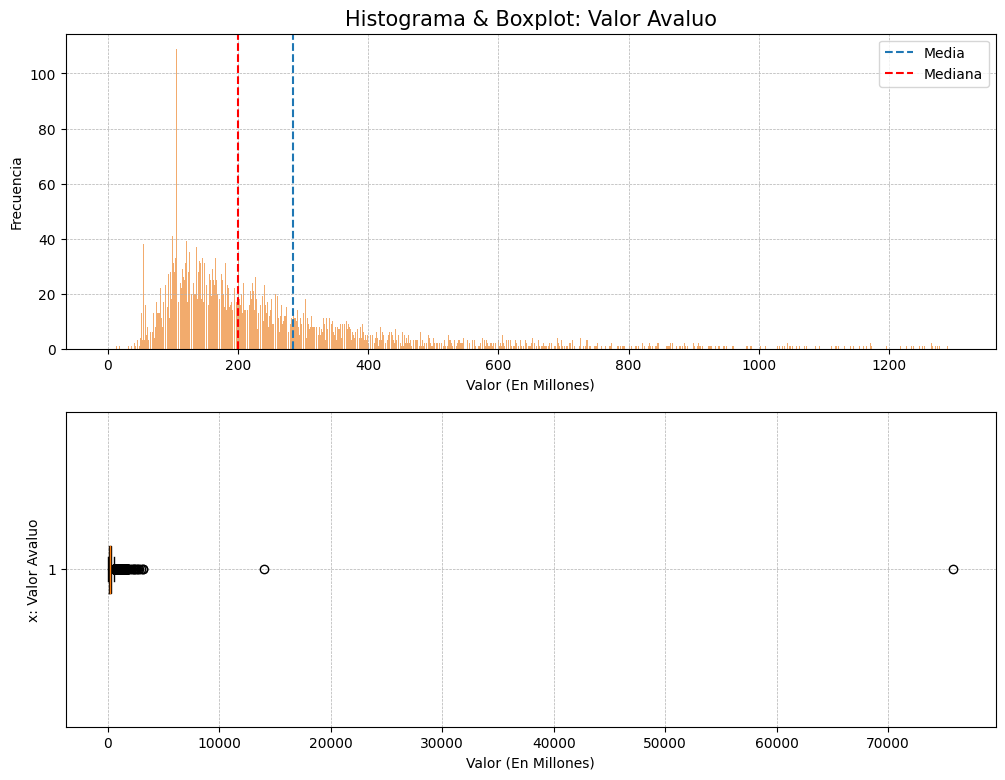

In [19]:
# Y graficamos la variable
get_graph(y, 1300)


A través del primer acercamiento estadístico detectamos varias característica de los valores de los avalúos de los inmuebles:
- $\mu_{mean} > \mu_{median}$ lo que indica, en primer lugar, que no se trata de una distribución normal. También indica la presencia de un sesgo positivo (como se corrobora en el gráfico).
- A consecuencia de lo anterior, debemos usar estadísticos no paramétricos para analizar los valores de la serie.
- Los valores extremos $(min, max)$ son muy extraños y pueden representar errores de medición o bien pueden ser outliers; sin embargo, como no tenemos contexto sobre la base de datos, se tomarán como errores de medición, a no ser que muestren no ser influyentes
- El punto anterior se ve reflejado en la gráfica del BoxPlot que muestra que son 2 los valores extremos más prominentes.

#### 2.1.2 Outliers.

In [20]:
# Se detecta la cantidad de outliers mediante la metodología boxplot
# Obtenemos los datos del Box-Plot...
q3, q1 = np.percentile(y, [75, 25])
iqr = q3 - q1
atipico_min = q1 - 1.5*iqr
atipico_max = q3 + 1.5*iqr
extrem_min = q1 - 3*iqr
extrem_max = q3 + 3*iqr

# Calculamos la cantidad de valores atipicos y extremos:
print('Valores atipicos por debajo:', (y < atipico_min).sum(), 'representan el', str((((y < atipico_min).sum())/len(y))*100)+'% de la muestra')
print('Valores atipicos por arriba:', (y > atipico_max).sum(), 'representan el', str((((y > atipico_max).sum())/len(y))*100)+'% de la muestra')
print('Valores extremos por debajo:', (y < extrem_min).sum(), 'representan el', str((((y < extrem_min).sum())/len(y))*100)+'% de la muestra')
print('Valores extremos por arriba:', (y > extrem_max).sum(), 'representan el', str((((y > extrem_max).sum())/len(y))*100)+'% de la muestra')

Valores atipicos por debajo: 0 representan el 0.0% de la muestra
Valores atipicos por arriba: 484 representan el 7.545993140006237% de la muestra
Valores extremos por debajo: 0 representan el 0.0% de la muestra
Valores extremos por arriba: 199 representan el 3.102588088556283% de la muestra


La cantidad de valores extremos es relativamente baja lo que permité eliminarlos sin tener problemas significativos en la variabilidad de la muestra

In [21]:
print('Len antes del filtro', len(df_test))
mask_1 = df_test['valor_total_avaluo']/1e6 > max(atipico_min, 10)
mask_2 = df_test['valor_total_avaluo']/1e6 < extrem_max
df_test_cl = df_test[mask_1&mask_2]
print('Len antes del filtro', len(df_test_cl))

Len antes del filtro 6414
Len antes del filtro 6215


In [22]:
# Generamos nuevamente las estadísticas descriptivas
y = df_test_cl['valor_total_avaluo']/1e6
y.describe()

count    6215.000000
mean      240.146990
std       155.288603
min        13.415745
25%       130.230350
50%       195.363500
75%       301.327610
max       869.804000
Name: valor_total_avaluo, dtype: float64

Luego de suprimir los valores extremos se obtiene un comportamiento de la variable dependiente mucho más consistente, la media y mediana tienen un valor más cercano entre sí como muestra de esto.

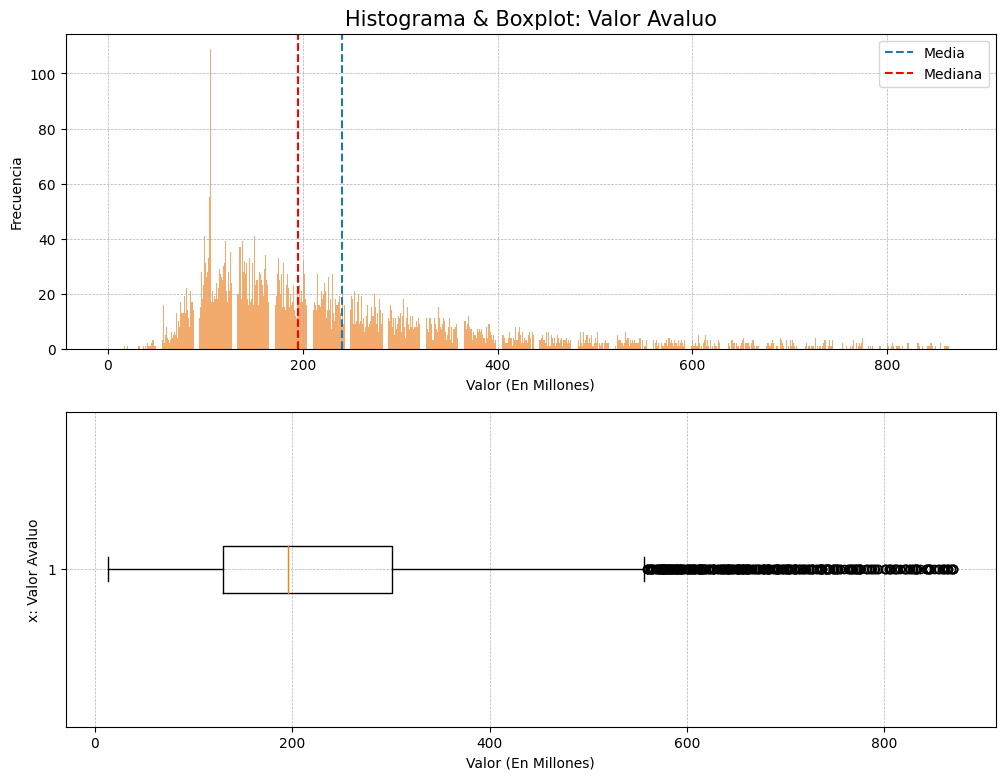

In [23]:
get_graph(y, int(max(y)))

### 2.2 Analisis de correlacion para las variables independientes

Al ser la cantidad de datos tan grande, un análisis manual no es viable, por lo que se opta por detectar todas las variables que no poseen una relación lineal con el valor de avaluo y eliminarlas del análisis debido a que su aporte al modelo de predicción de precios puede ser mínimo o, peor, pueden llegarse a incluir sesgos en el modelo.

In [24]:
# Generamos una matriz de correlaciones para las variables numéricas
df_num = df_test_cl[variables_float+variables_dummy+variables_categ_dummy]
corr_df = df_num.corr(method='spearman') # se usa la correlación de Spearman debido a que es un estadístico no parametrico


# Ahora generamos tres listas de variables según su correlacion con la variable principal, por lo que tendríamos 3 df para generar los modelos de prediccion
var_significativas_10 = corr_df[abs(corr_df['valor_total_avaluo']) > 0.1]
var_significativas_10 = list(var_significativas_10.index)
var_significativas_20 = corr_df[abs(corr_df['valor_total_avaluo']) > 0.2]
var_significativas_20 = list(var_significativas_20.index)
var_significativas_30 = corr_df[abs(corr_df['valor_total_avaluo']) > 0.3]
var_significativas_30 = list(var_significativas_30.index)
print('# Var. con corr mayor a 10%:',len(var_significativas_10))
print('# Var. con corr mayor a 20%:',len(var_significativas_20))
print('# Var. con corr mayor a 30%:',len(var_significativas_30))


# Ahora generamos los DF para entrenar los modelos:
df_train_1 = df_test_cl[var_significativas_10]
df_train_2 = df_test_cl[var_significativas_20]
df_train_3 = df_test_cl[var_significativas_30]

# Var. con corr mayor a 10%: 83
# Var. con corr mayor a 20%: 52
# Var. con corr mayor a 30%: 24


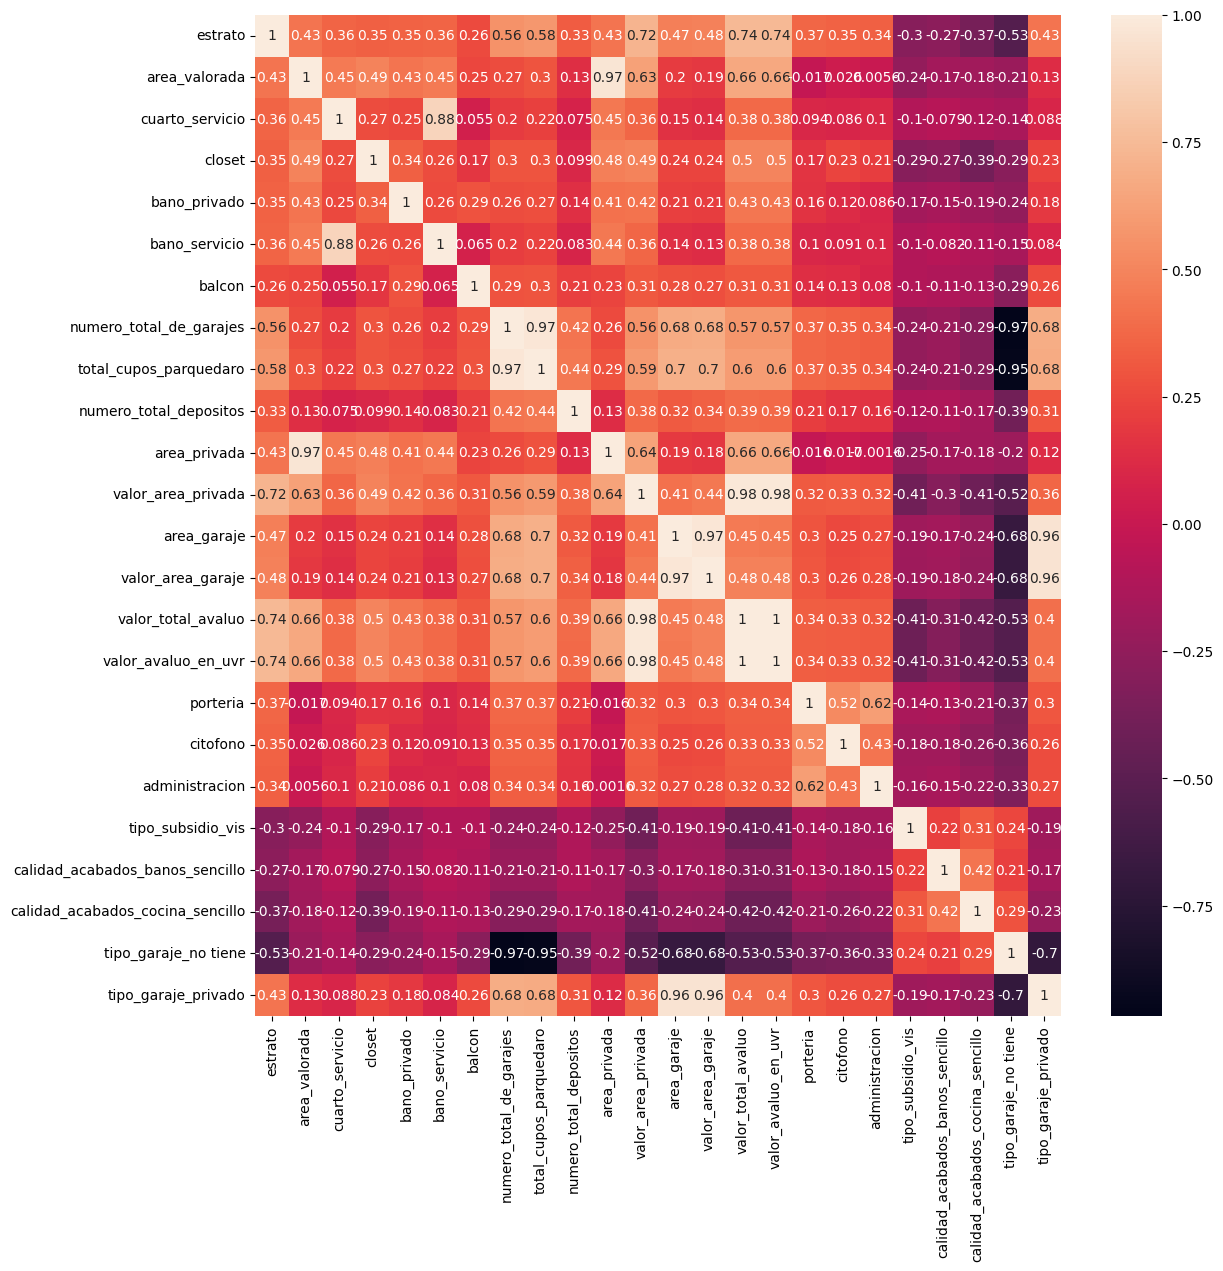

In [25]:
# Análisis de correlacion de las variables relevantes
plt.figure(figsize=(13, 13))
sb.heatmap(df_train_3.corr(method='spearman'), annot=True)
plt.show()

Se observa que las dos variables con mayor correlacion con la variable principal son valor avaluo en uvr y valor area privada. En la practica no es posible contar con estos valores antes de avaluar un inmueble por lo que se eliminan del análisis, ademas si se incluyesen, podrían acarrear problemas de multicolinealidad.

## 3. Predicción de Precios.

### 3.0 Preprocesamiento de los datos de entrenamiento y prueba.

In [26]:
# Verificamos que todos los datos que poseemos sean numéricos
df_num.dtypes.value_counts()

uint8      204
float64     74
int64       15
dtype: int64

In [27]:
# Eliminamos las variables valor
variables_valores = []
for i in list(df_num.columns):
    if ('valor' in i)|('valores' in i):
        if (i == 'area_valorada')|(i == 'proposito_valor asegurable'):
            pass
        else:
            variables_valores.append(i)

variables_valores

['valor_area_privada',
 'valor_area_garaje',
 'valor_area_deposito',
 'valor_area_terreno',
 'valor_area_construccion',
 'valor_area_otros',
 'valor_area_libre',
 'valor_total_avaluo',
 'valor_uvr',
 'valor_avaluo_en_uvr']

In [28]:
# Separamos la variable dependiente del resto de datos
df_num_RF = df_num.dropna()
y = df_num_RF['valor_total_avaluo']
X = df_num_RF.drop(variables_valores, axis = 1)

In [29]:
# Separamos la base de entrenamiento de la de prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
# Normalizamos la base datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 3.1 Modelo Decision Tree Regression.

In [31]:
# Entrenamiento y testeo de random forest
dt_reg = DecisionTreeRegressor(max_depth=5)
regressor = dt_reg.fit(X_train, y_train)
y_predDT = regressor.predict(X_test)

In [32]:
# Medimos su MAPE
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_predDT))
print('RMSE:', 	np.sqrt(metrics.mean_squared_error(y_test, y_predDT)))
print('R2:', metrics.r2_score(y_test, y_predDT))
print('Cross-Validation-Score', cross_val_score(dt_reg, X_train, y_train, cv=10).mean())

MAPE: 0.2599984652779464
RMSE: 78712926.23045881
R2: 0.7496456633071311
Cross-Validation-Score 0.7390580568511915


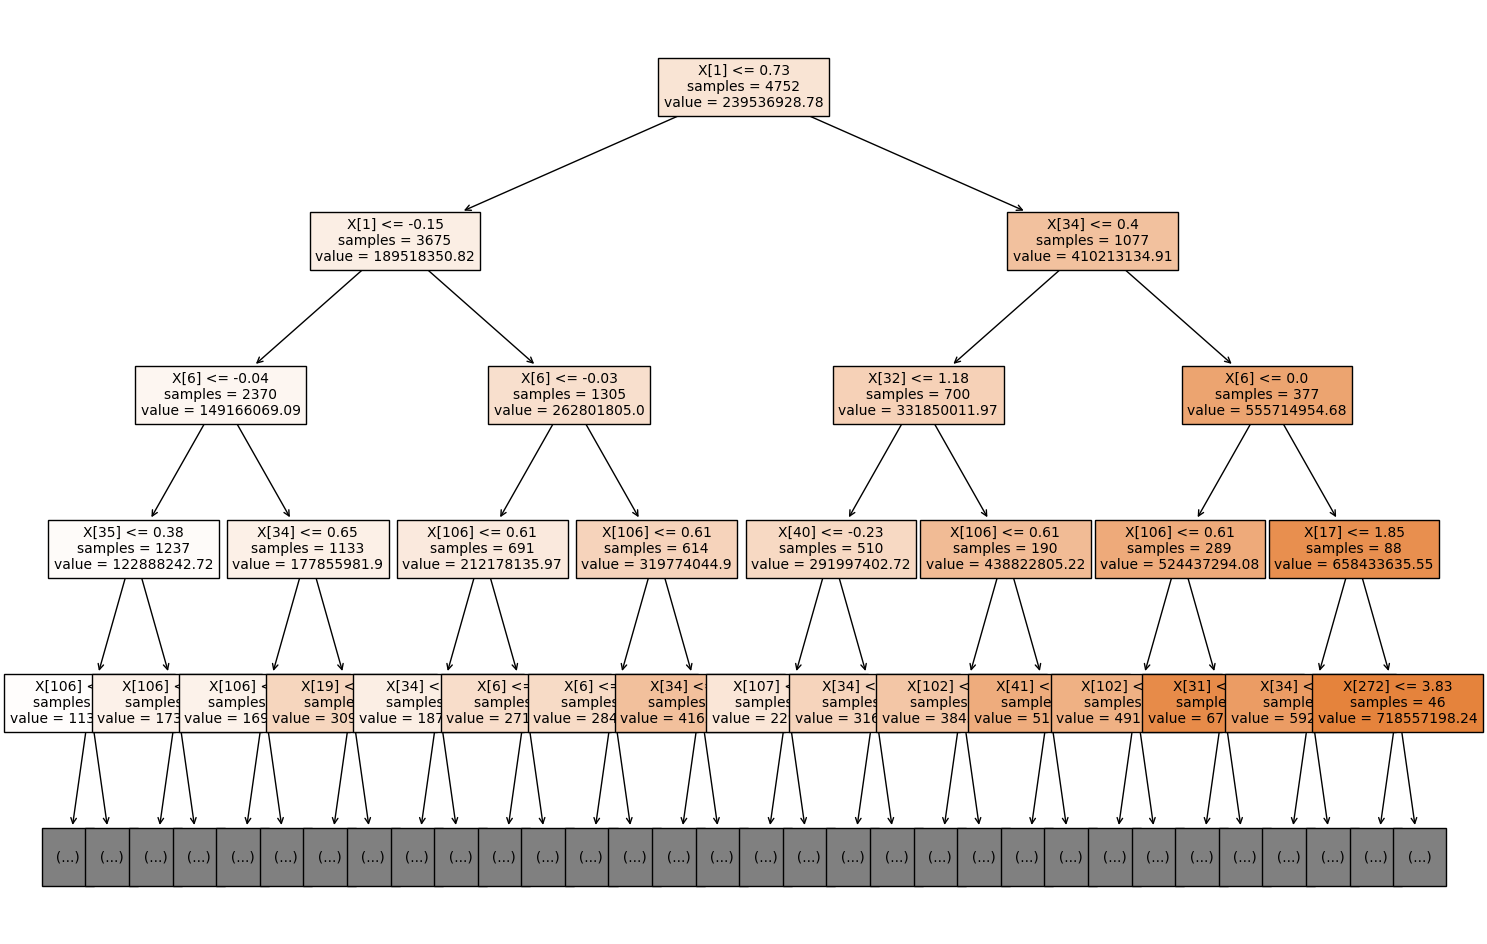

In [33]:
fig, ax = plt.subplots(figsize=(18,12))
from sklearn.tree import plot_tree
names = []
plot = plot_tree(decision_tree = regressor, fontsize = 10, precision = 2, 
                 ax = ax, filled = True, impurity = False, max_depth = 4)

Se detecta que gran parte de la variabilidad se explica por medio de dos factores el *valor_avaluo_en_uvr* y el *valor_area_privada* privada cuyas correlaciones con la variable principal son cercanas a 1. Sin embargo, los modelos Decision Tree y Random Forest no sufren problemas de multicolinealidad por lo que se decide dejar estas variables en el modelo.

### 3.2. Modelo Random Forest Regression.

In [34]:
# Entrenamiento y testeo de random forest
rf_reg = RandomForestRegressor(random_state=50, n_estimators=800)
regressor = rf_reg.fit(X_train, y_train)
y_predRF = regressor.predict(X_test)

In [35]:
# Medimos su MAPE
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_predRF))
print('RMSE:', 	np.sqrt(metrics.mean_squared_error(y_test, y_predRF)))
print('R2:', metrics.r2_score(y_test, y_predRF))
print('Cross-Validation-Score', cross_val_score(rf_reg, X_train, y_train, cv=5).mean())

MAPE: 0.15290694914243902
RMSE: 53483814.4717876
R2: 0.8844133305662699
Cross-Validation-Score 0.877466245745522


Importancia de los predictores en el modelo
-------------------------------------------


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'estrato'),
  Text(1, 0, 'area_privada'),
  Text(2, 0, 'area_valorada'),
  Text(3, 0, 'departamento_inmueble_bogota d c'),
  Text(4, 0, 'total_cupos_parquedaro')])

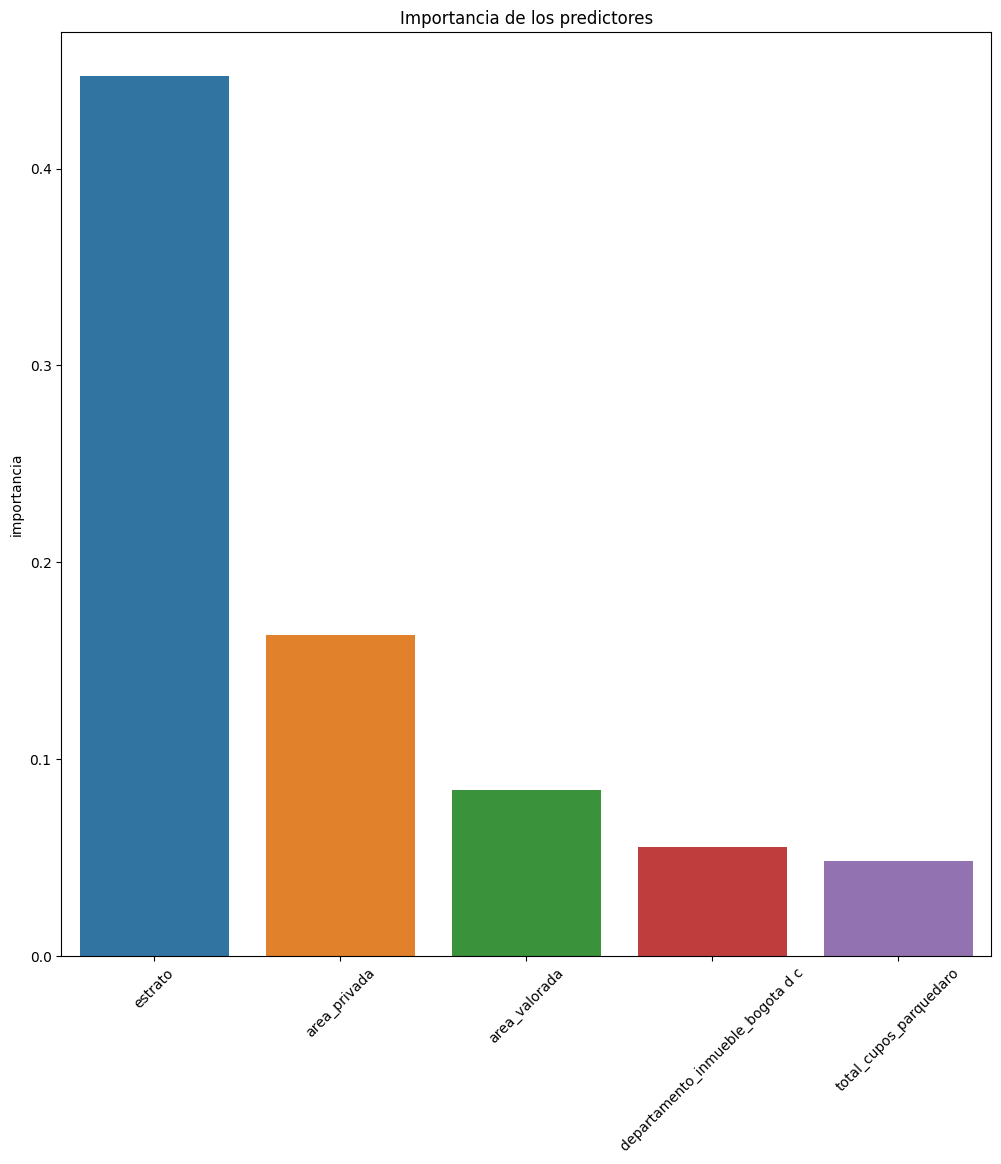

In [37]:
# Revisión de la importancia de los predictores

importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': rf_reg.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
pesos = importancia_predictores.sort_values('importancia', ascending=False).iloc[0:5]
fig, ax = plt.subplots(figsize=(12,12))
sb.barplot(x = list(pesos.predictor), y = pesos.importancia)
plt.title('Importancia de los predictores')
plt.xticks(rotation=45)

### 3.3 Modelo Regresion Lineal Múltiple

In [38]:
# Eliminamos las variables que posiblemente generen problemas de multicolinealidad
for i in ['valor_area_privada', 'valor_area_garaje', 'valor_total_avaluo', 'valor_avaluo_en_uvr', 'area_garaje', 'area_valorada']:
    var_significativas_30.remove(i)

In [39]:
y = df_num_RF['valor_total_avaluo']
X = df_num_RF[list(var_significativas_30)]

In [40]:
# Separamos la base de entrenamiento de la de prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
# Normalizamos la base datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
reg_multi = LinearRegression()
reg = reg_multi.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [43]:
# Medimos su MAPE
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('RMSE:', 	np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))
print('Cross-Validation-Score', cross_val_score(reg_multi, X_train, y_train, cv=5).mean())

MAPE: 0.29658802362511844
RMSE: 92594826.99877836
R2: 0.653553281659473
Cross-Validation-Score 0.6773544808908312


## 4. Comparacion de modelos

Luego de comparar los tres modelos, obtenemos que el modelo Random Forest es el que mejor comportamiento tiene respecto a los datos de testeo. Por ende, elegimos el modelo Random Forest para hacer la predicción de precios.